In [734]:
#Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [735]:
data = pd.read_excel("Pre-Super_Day_candidate_dataset__28candidate_29.xlsx")

In [736]:
# Columns not necessary for deciding approval process
data = data.drop(['User ID', 'applications'], axis = 1)

In [737]:
data.head()

,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty
0,cover_an_unexpected_cost,100000,669,fair,full_time,consumer_discretionary,5024,927,0,B,0,0
1,credit_card_refinancing,70000,594,fair,full_time,information_technology,5764,1177,0,B,0,0
2,home_improvement,10000,596,fair,full_time,information_technology,4017,1487,0,A,0,0
3,home_improvement,100000,642,fair,part_time,energy,3129,904,0,A,0,0
4,major_purchase,30000,642,fair,full_time,energy,4220,1620,0,A,0,0


In [738]:
#Replacing values for clearer meaning (Will be changed later)
replacements = {0:'no',1:'yes'}
replacements_2 = {0:'no',1:'yes'}
data['Approved'] = data['Approved'].map(replacements)
data['Ever_Bankrupt_or_Foreclose'] = data['Ever_Bankrupt_or_Foreclose'].map(replacements_2)

In [739]:
data.shape

(100000, 12)

In [740]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Reason                      100000 non-null  object
 1   Loan_Amount                 100000 non-null  int64 
 2   FICO_score                  100000 non-null  int64 
 3   Fico_Score_group            100000 non-null  object
 4   Employment_Status           100000 non-null  object
 5   Employment_Sector           93593 non-null   object
 6   Monthly_Gross_Income        100000 non-null  int64 
 7   Monthly_Housing_Payment     100000 non-null  int64 
 8   Ever_Bankrupt_or_Foreclose  100000 non-null  object
 9   Lender                      100000 non-null  object
 10  Approved                    100000 non-null  object
 11  bounty                      100000 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 9.2+ MB


**Looking at null values**

**Filling each of the missing Employment Sectors with None value**

**The only column with NAs is Employment_Sector and using the mode to fill in the NAs**

In [741]:
for c in categorical_columns:
    if data[c].isnull().any():
        mode_values = data[c].mode()
        if not mode_values.empty:
            mode_value = mode_values[0]
            data[c].fillna(mode_value, inplace=True)

In [742]:
data.isnull().sum().sort_values(ascending=False)

Reason                        0
Loan_Amount                   0
FICO_score                    0
Fico_Score_group              0
Employment_Status             0
Employment_Sector             0
Monthly_Gross_Income          0
Monthly_Housing_Payment       0
Ever_Bankrupt_or_Foreclose    0
Lender                        0
Approved                      0
bounty                        0
dtype: int64

In [743]:
data.head()

,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty
0,cover_an_unexpected_cost,100000,669,fair,full_time,consumer_discretionary,5024,927,no,B,no,0
1,credit_card_refinancing,70000,594,fair,full_time,information_technology,5764,1177,no,B,no,0
2,home_improvement,10000,596,fair,full_time,information_technology,4017,1487,no,A,no,0
3,home_improvement,100000,642,fair,part_time,energy,3129,904,no,A,no,0
4,major_purchase,30000,642,fair,full_time,energy,4220,1620,no,A,no,0


In [744]:
data.columns

Index(['Reason', 'Loan_Amount', 'FICO_score', 'Fico_Score_group',
       'Employment_Status', 'Employment_Sector', 'Monthly_Gross_Income',
       'Monthly_Housing_Payment', 'Ever_Bankrupt_or_Foreclose', 'Lender',
       'Approved', 'bounty'],
      dtype='object')

**Data Engineering New Columns For Better Understanding of Approval Process**

In [745]:
data['Monthly_income_after_housing'] = data['Monthly_Gross_Income'] - data['Monthly_Housing_Payment']
data['Percentage_income_housing_payment'] = round((data['Monthly_Housing_Payment'] / data['Monthly_Gross_Income'])*100,2)

In [746]:
numerical_columns = data.select_dtypes(include='int64').columns
cateogircal_columns = data.select_dtypes(include='object').columns

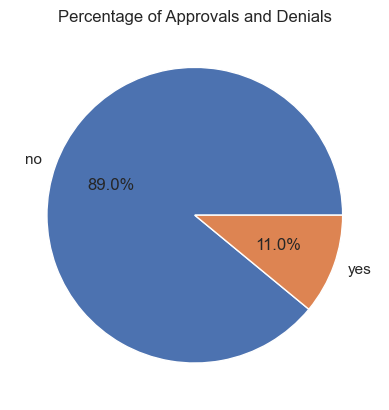

In [747]:
# Approval vs Non-Approvals
df_temp = data['Approved'].value_counts()
plt.pie(df_temp.values,
        labels = df_temp.index,
        autopct = '%1.1f%%')
plt.title("Percentage of Approvals and Denials")
plt.show()

In [748]:
data[data['Approved'] =='yes']['Approved'].count()

10976

In [749]:
total_revenue_all_lenders = data['bounty'].sum()
print(total_revenue_all_lenders)

2641500


**Looking at each of the categorical variables aganist the approved column (Sepearating Charts for sizing purposes)**

In [750]:
for j in categorical_columns : 
    a = data[j].value_counts(normalize = True)
    b = a*100
    print(b)

debt_conslidation           27.622
cover_an_unexpected_cost    18.782
credit_card_refinancing     17.139
major_purchase              16.023
home_improvement            11.316
other                        9.118
Name: Reason, dtype: float64
full_time     76.530
part_time     17.064
unemployed     6.406
Name: Employment_Status, dtype: float64
information_technology    26.155
health_care               12.403
real_estate                9.297
financials                 9.262
consumer_staples           8.974
industrials                7.559
materials                  6.748
communication_services     6.655
energy                     5.264
utilities                  4.536
consumer_discretionary     3.147
Name: Employment_Sector, dtype: float64
no     97.754
yes     2.246
Name: Ever_Bankrupt_or_Foreclose, dtype: float64
fair         36.475
poor         28.475
good         27.760
very_good     5.102
excellent     2.188
Name: Fico_Score_group, dtype: float64


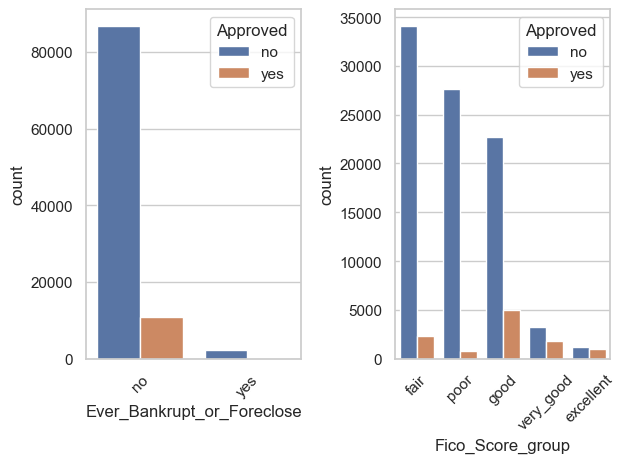

In [751]:
num_plots = len(['Ever_Bankrupt_or_Foreclose', 'Fico_Score_group'])
fig, axes = plt.subplots(1, num_plots)
for i, col in enumerate(['Ever_Bankrupt_or_Foreclose', 'Fico_Score_group']):
    sb.countplot(data=data, x=col, hue='Approved', ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
plt.tight_layout() 
plt.show()

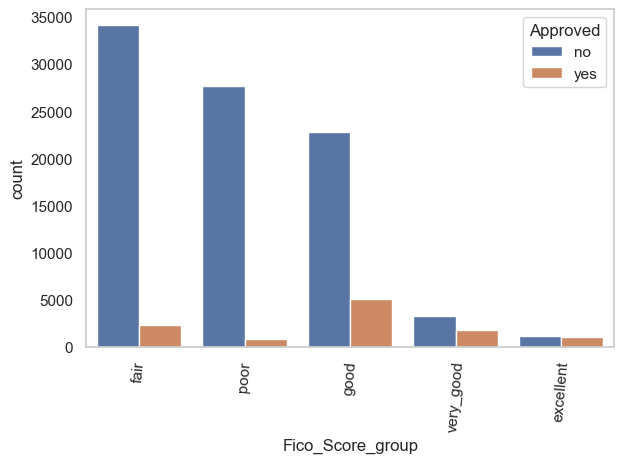

In [789]:
num_plots = len(['Fico_Score_group'])
fig, axes = plt.subplots(1, num_plots)
for i, col in enumerate(['Fico_Score_group']):
    sb.countplot(data=data, x=col, hue='Approved', ax=axes)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=85)
    axes.grid(False)
plt.tight_layout() 
plt.show()

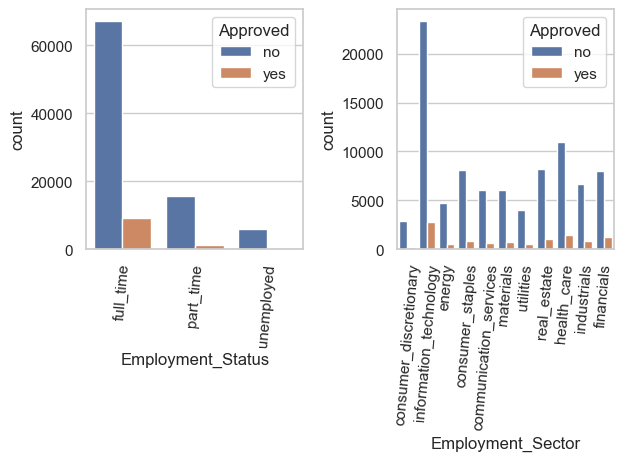

In [753]:
num_plots = len(['Employment_Status', 'Employment_Sector'])
fig, axes = plt.subplots(1, num_plots)
for i, col in enumerate(['Employment_Status','Employment_Sector']):
    sb.countplot(data=data, x=col, hue='Approved', ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=85)
plt.tight_layout() 
plt.show()

In [754]:
for i in categorical_columns :
    j = pd.crosstab(data['Approved'],data[i],normalize = 'columns')
    print(j)

Reason    cover_an_unexpected_cost  credit_card_refinancing  \
Approved                                                      
no                        0.890693                 0.887333   
yes                       0.109307                 0.112667   

Reason    debt_conslidation  home_improvement  major_purchase     other  
Approved                                                                 
no                 0.891065          0.890244         0.89047  0.891862  
yes                0.108935          0.109756         0.10953  0.108138  
Employment_Status  full_time  part_time  unemployed
Approved                                           
no                  0.879289   0.918776    0.945052
yes                 0.120711   0.081224    0.054948
Employment_Sector  communication_services  consumer_discretionary  \
Approved                                                            
no                               0.904282                0.915793   
yes                              0.0

**Inital Observations**

- Lender A saw most success in approving applicants.
- Almost impossible to be approved if been bankrupt or foreclosed in the past.
- Loan amounts between 10,000 and 30,000 saw the highest approval success rate.
- All Fico credit score groups have a similar approval rate outside of good having a higher rate than the rest.
- Not much varaition in the approval based on reasoning. (A lot more people used the reasoning of debt consildation overall)
- Full-time employment status had a major advantage over part-time and unemployed status in loan approval rates.
- Similar varaiation in approvals through employment sectors with information technology seeing a little higher rate than the rest.

**Looking at each of the numerical variables distribution seperating approvals and rejections (Sepearating Charts for sizing purposes)**

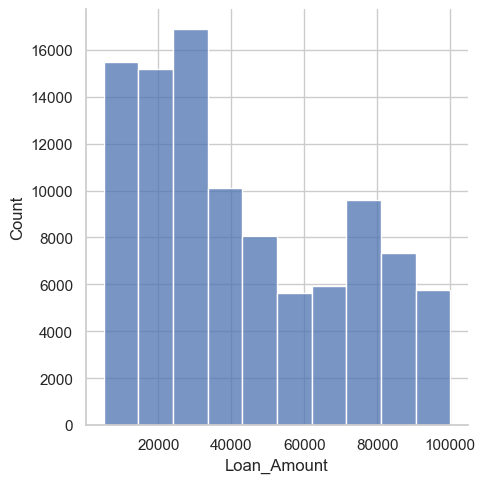

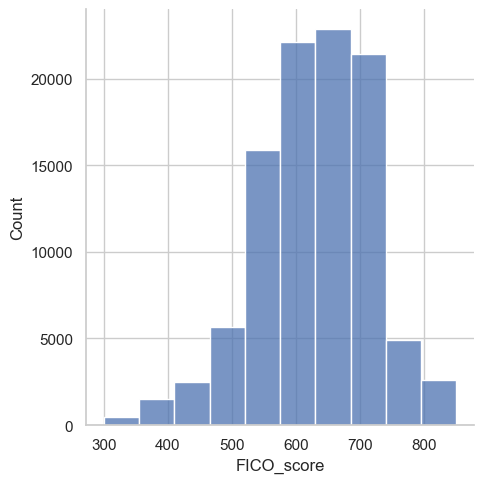

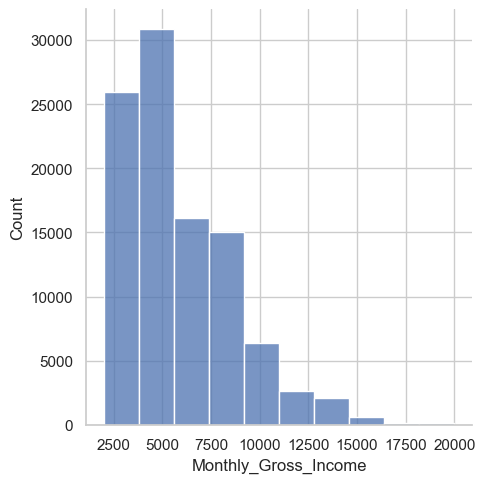

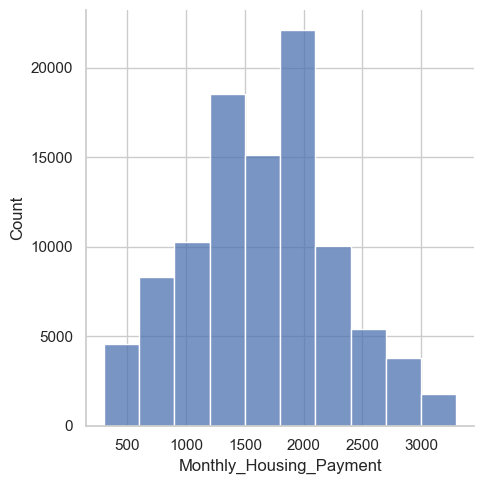

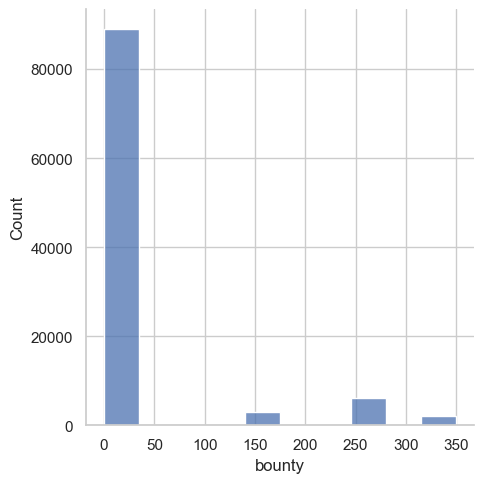

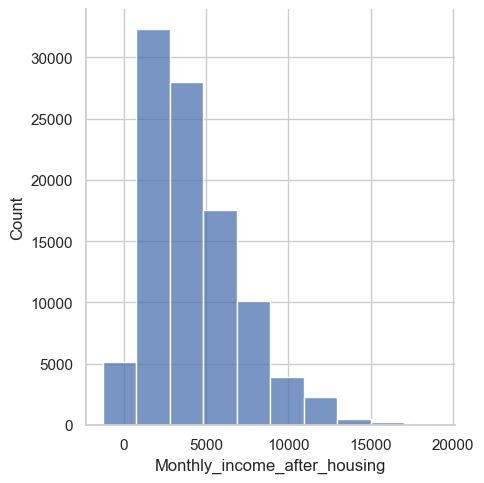

In [755]:
for idx,num_col in enumerate(numerical_columns):
    sns.displot(x= num_col,data=data,bins=10)
    plt.show()

In [756]:
data_approvals = data[data['Approved'] == 'yes']
data_rejections = data[data['Approved'] == 'no']

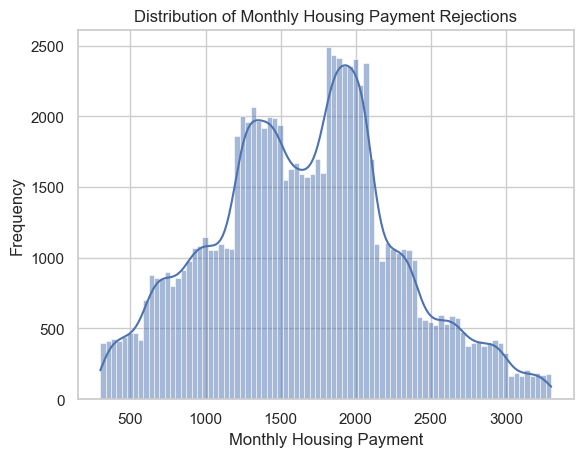

In [757]:
plt.figure()
sb.histplot(data=data_rejections['Monthly_Housing_Payment'], kde=True)
plt.xlabel('Monthly Housing Payment')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Housing Payment Rejections')
plt.show()

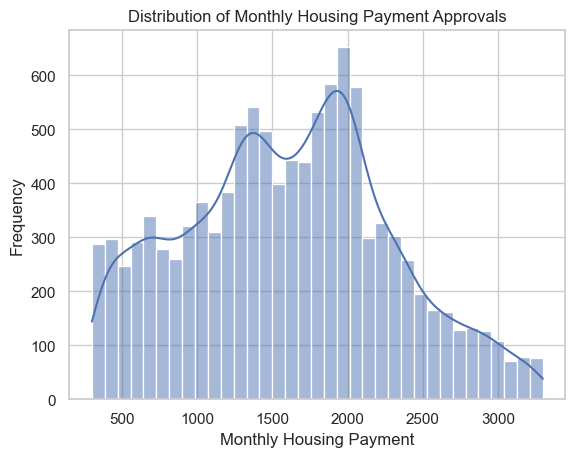

In [758]:
plt.figure()
sb.histplot(data=data_approvals['Monthly_Housing_Payment'], kde=True)
plt.xlabel('Monthly Housing Payment')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Housing Payment Approvals')
plt.show()

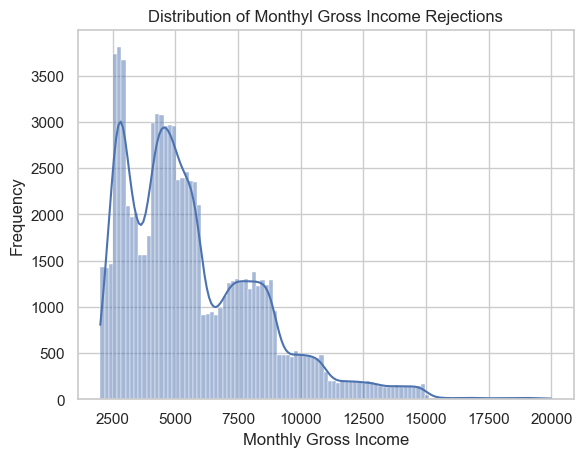

In [759]:
plt.figure() 
sb.histplot(data=data_rejections['Monthly_Gross_Income'], kde=True)
plt.xlabel('Monthly Gross Income')
plt.ylabel('Frequency')
plt.title('Distribution of Monthyl Gross Income Rejections')
plt.show()

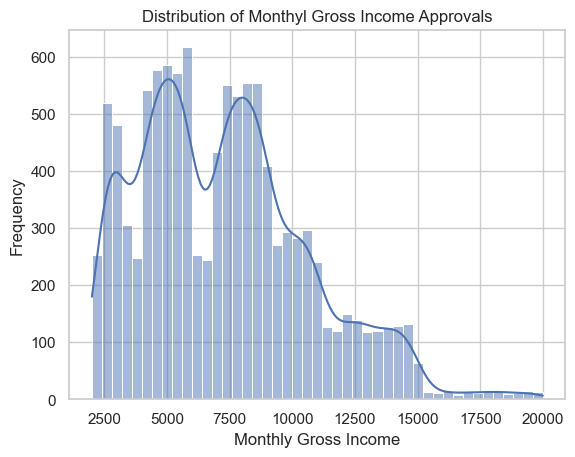

In [760]:
plt.figure() 
sb.histplot(data=data_approvals['Monthly_Gross_Income'], kde=True)
plt.xlabel('Monthly Gross Income')
plt.ylabel('Frequency')
plt.title('Distribution of Monthyl Gross Income Approvals')
plt.show()

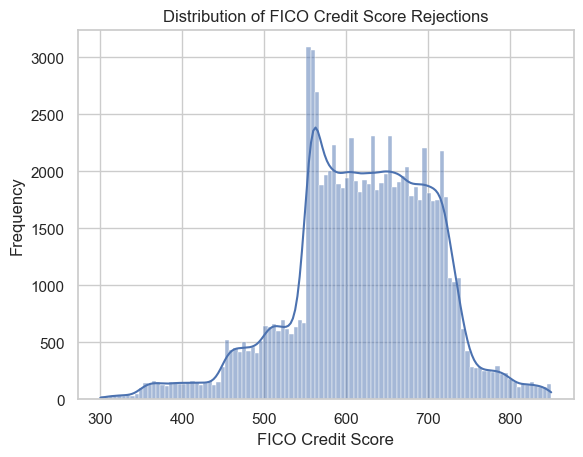

In [761]:
plt.figure() 
sb.histplot(data=data_rejections['FICO_score'], kde=True)
plt.xlabel('FICO Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of FICO Credit Score Rejections')
plt.show()

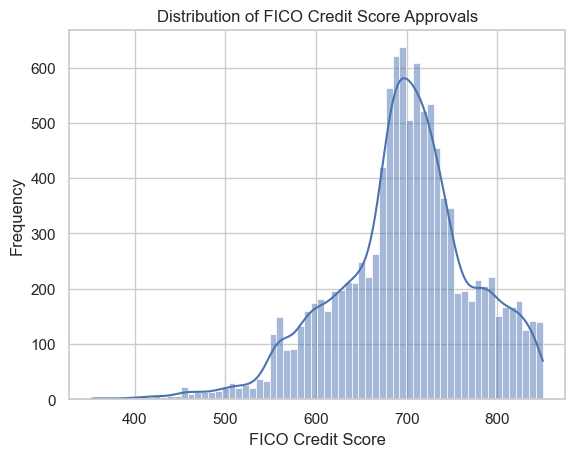

In [762]:
plt.figure() 
sb.histplot(data=data_approvals['FICO_score'], kde=True)
plt.xlabel('FICO Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of FICO Credit Score Approvals')
plt.show()

C:\Users\ekroo\AppData\Local\Temp\ipykernel_47460\653520769.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append({'Statistic': m,
C:\Users\ekroo\AppData\Local\Temp\ipykernel_47460\653520769.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append({'Statistic': m,
C:\Users\ekroo\AppData\Local\Temp\ipykernel_47460\653520769.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.append({'Statistic': m,
C:\Users\ekroo\AppData\Local\Temp\ipykernel_47460\653520769.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_stats = summary_stats.appe

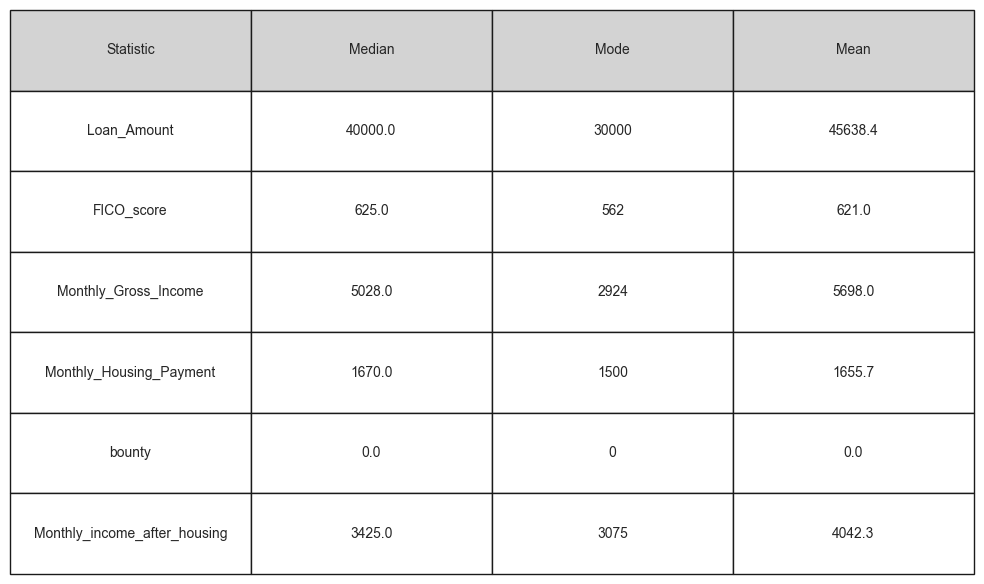

In [763]:
summary_stats = pd.DataFrame(columns=['Statistic', 'Median', 'Mode', 'Mean'])
for m in numerical_columns:
    medians = data.groupby('Approved')[m].median()
    modes = data.groupby('Approved')[m].apply(lambda x: x.mode().iloc[0])
    means = data.groupby('Approved')[m].mean()
    summary_stats = summary_stats.append({'Statistic': m,
                                          'Median': round(medians.iloc[0], 1),
                                          'Mode': round(modes.iloc[0], 1),
                                          'Mean': round(means.iloc[0], 1)}, ignore_index=True)
plt.figure(figsize=(10, 6))
plt.axis('off')  # Hide axis
table = plt.table(cellText=summary_stats.values,
                  colLabels=summary_stats.columns,
                  loc='center',
                  cellLoc='center',
                  colColours=['lightgrey']*4,  # Set column color
                  bbox=[0, 0, 1, 1])  # Adjust bounding box to reduce whitespace
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.tight_layout()
plt.show()

**Now Looking at Each of the Lenders Approval Statistics**

In [764]:
sum_revenue = data[data['Approved'] == 'yes'].groupby('Lender')['bounty'].sum()
print(sum_revenue)

Lender
A    1507750
B     686000
C     447750
Name: bounty, dtype: int64


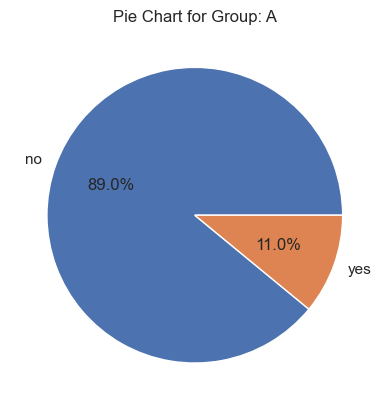

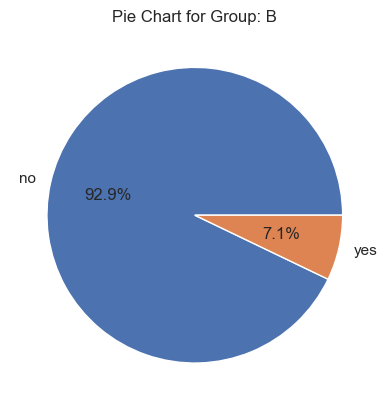

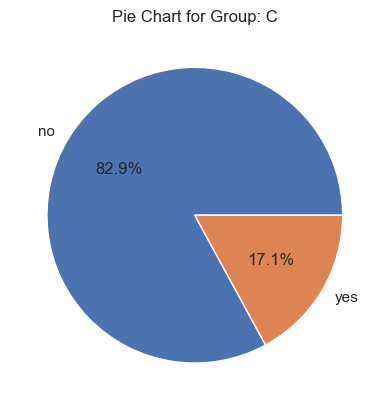

In [765]:
grouped_df = data.groupby('Lender')['Approved'].value_counts()

# Plot the pie chart for each group
for group_name, group_data in grouped_df.groupby(level=0):
    plt.figure()
    plt.title(f'Pie Chart for Group: {group_name}')
    plt.pie(group_data.values,
            labels=group_data.index.get_level_values(1),
            autopct='%1.1f%%')
    plt.show()

In [766]:
for j in categorical_columns : 
    a = data.groupby('Lender')[j].value_counts(normalize = True)
    b = a*100
    print(b)

Lender  Reason                  
A       debt_conslidation           27.632727
        cover_an_unexpected_cost    18.767273
        credit_card_refinancing     17.167273
        major_purchase              16.007273
        home_improvement            11.278182
        other                        9.147273
B       debt_conslidation           27.509091
        cover_an_unexpected_cost    18.530909
        credit_card_refinancing     17.352727
        major_purchase              16.072727
        home_improvement            11.341818
        other                        9.192727
C       debt_conslidation           27.765714
        cover_an_unexpected_cost    19.222857
        credit_card_refinancing     16.714286
        major_purchase              15.994286
        home_improvement            11.394286
        other                        8.908571
Name: Reason, dtype: float64
Lender  Employment_Status
A       full_time            80.163636
        part_time            18.181818
      

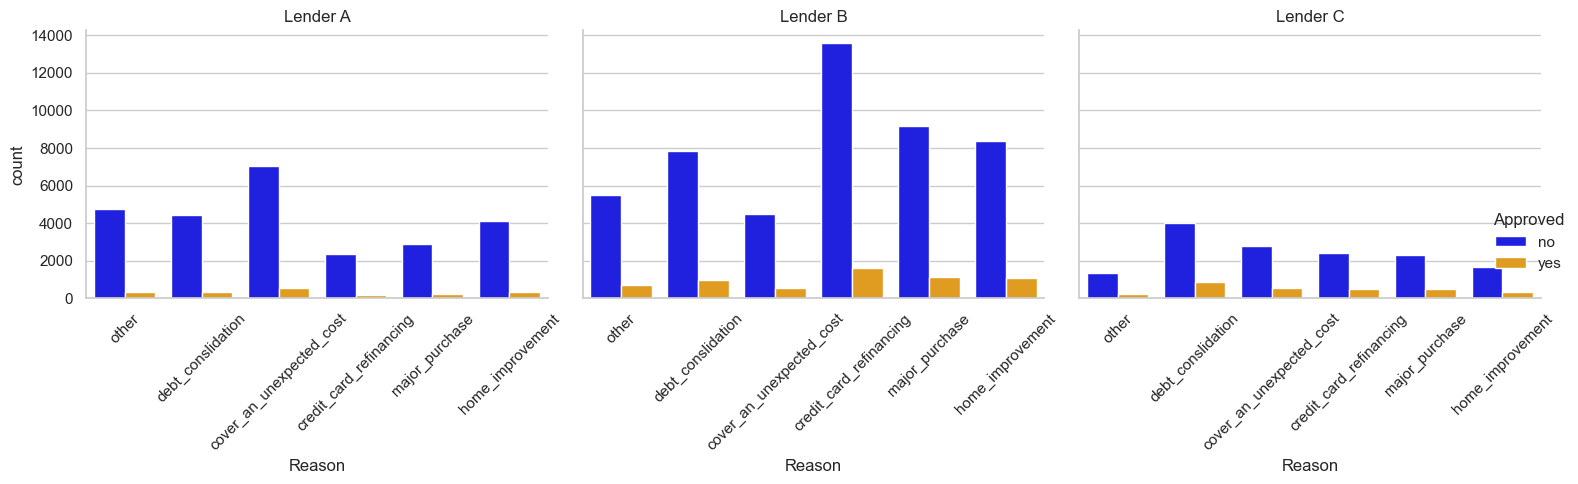

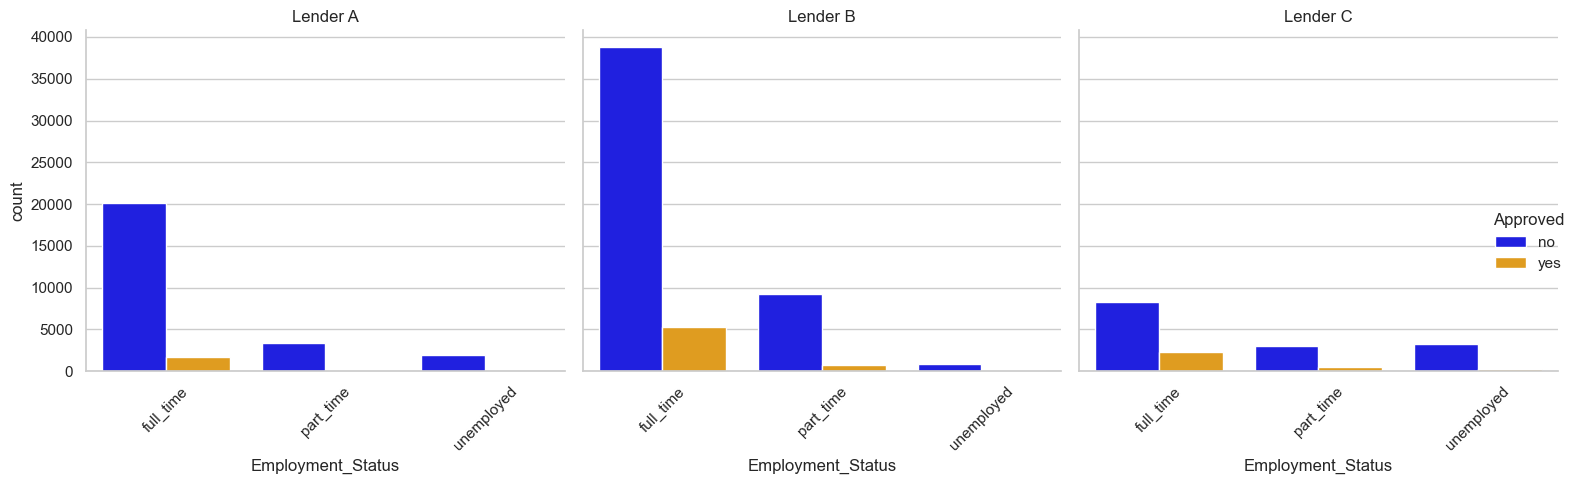

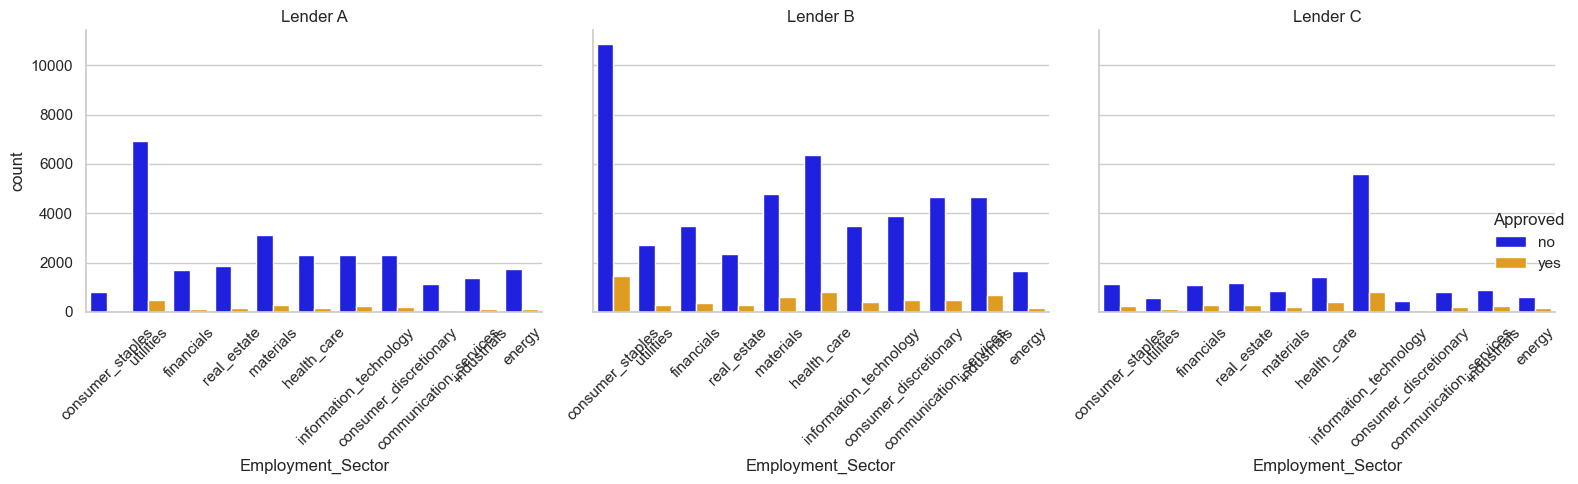

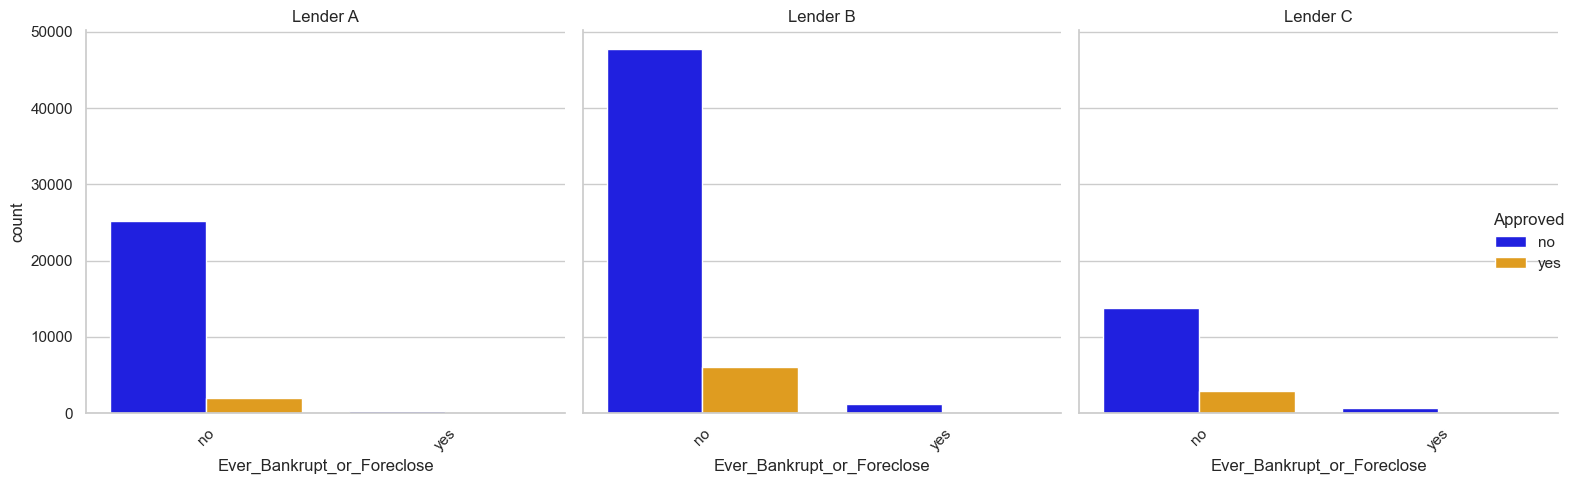

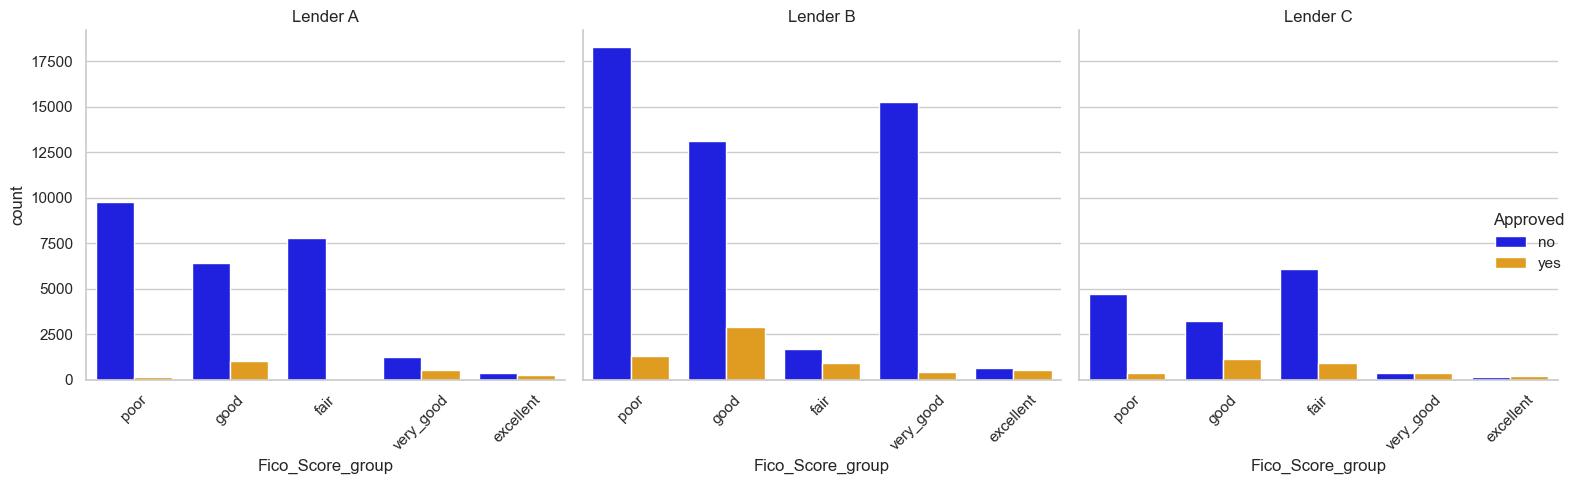

In [767]:
for col in categorical_columns:
    g = sns.FacetGrid(data, col='Lender', height=5, aspect=1)
    g.map_dataframe(sns.countplot, x=col, hue='Approved', ax=g.axes[0, 0], palette = {'no': 'blue', 'yes': 'orange'})
    g.set_axis_labels(x_var=col)
    g.axes[0, 0].set_title(col)
    g.set_xticklabels(rotation=45)
    g.add_legend(title='Approved')
    for ax, title in zip(g.axes.flat, ['Lender A', 'Lender B', 'Lender C']):
        ax.set_title(title)

    plt.tight_layout()
    plt.show()

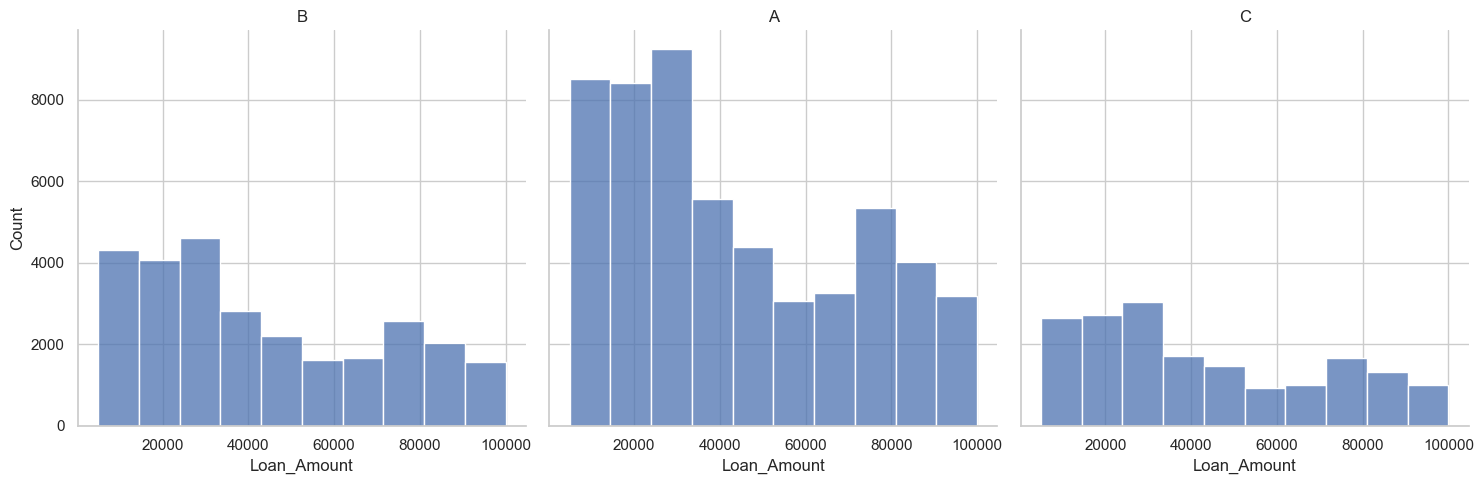

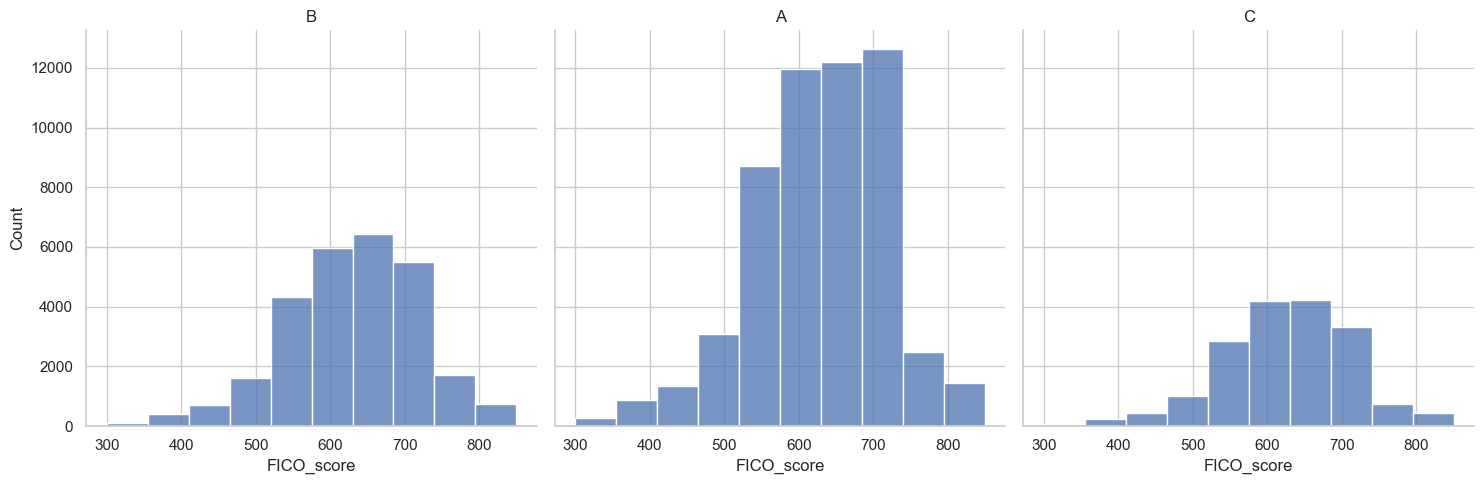

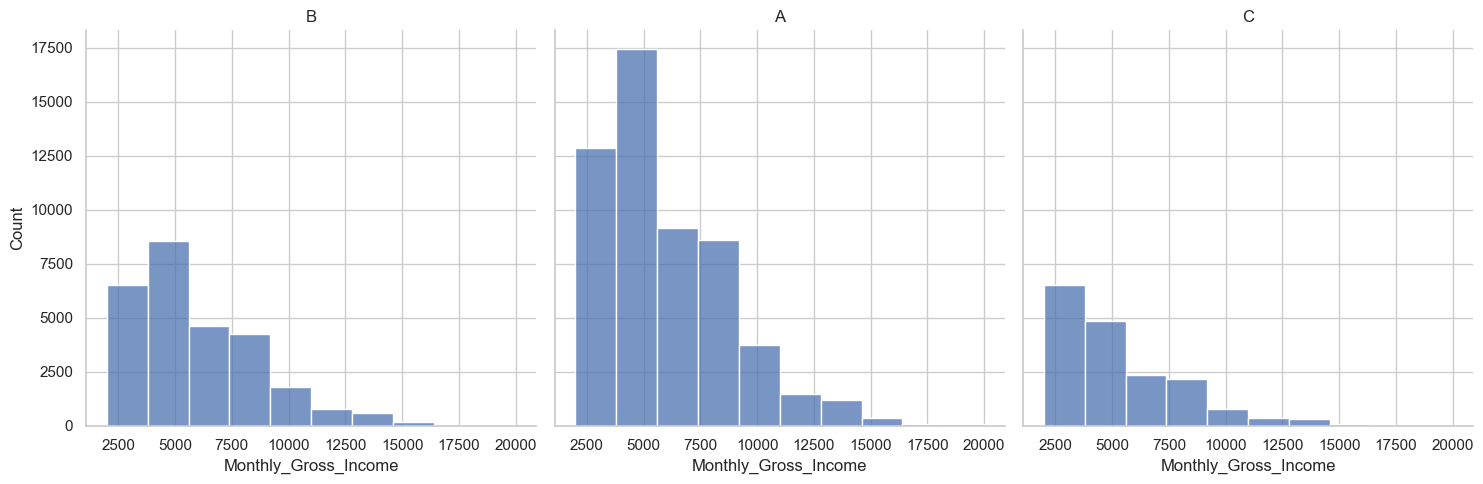

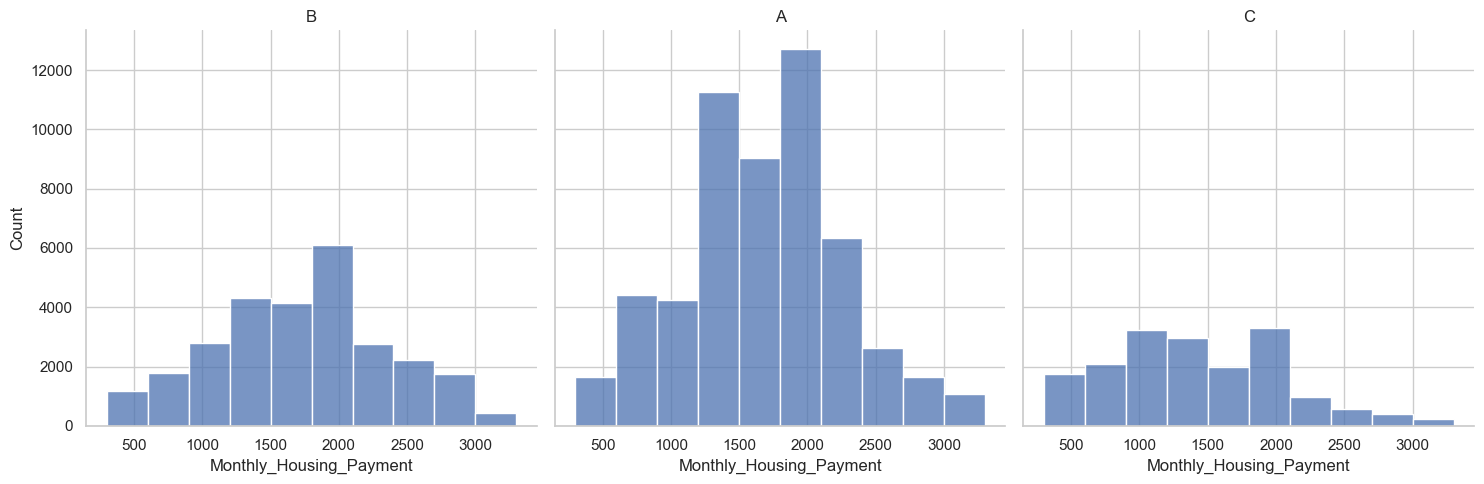

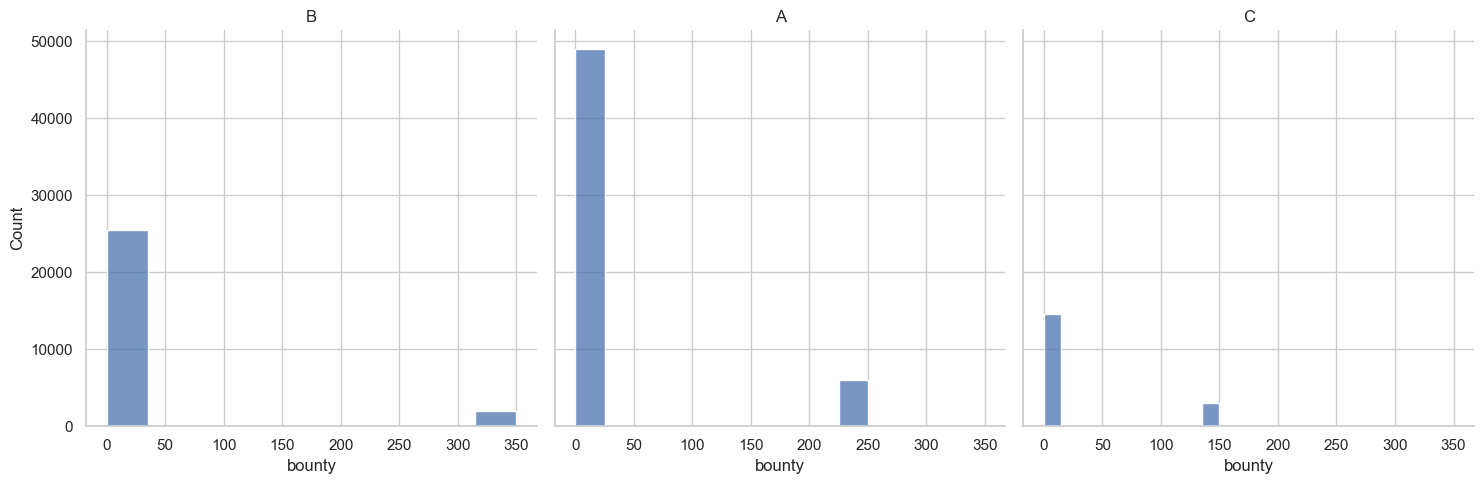

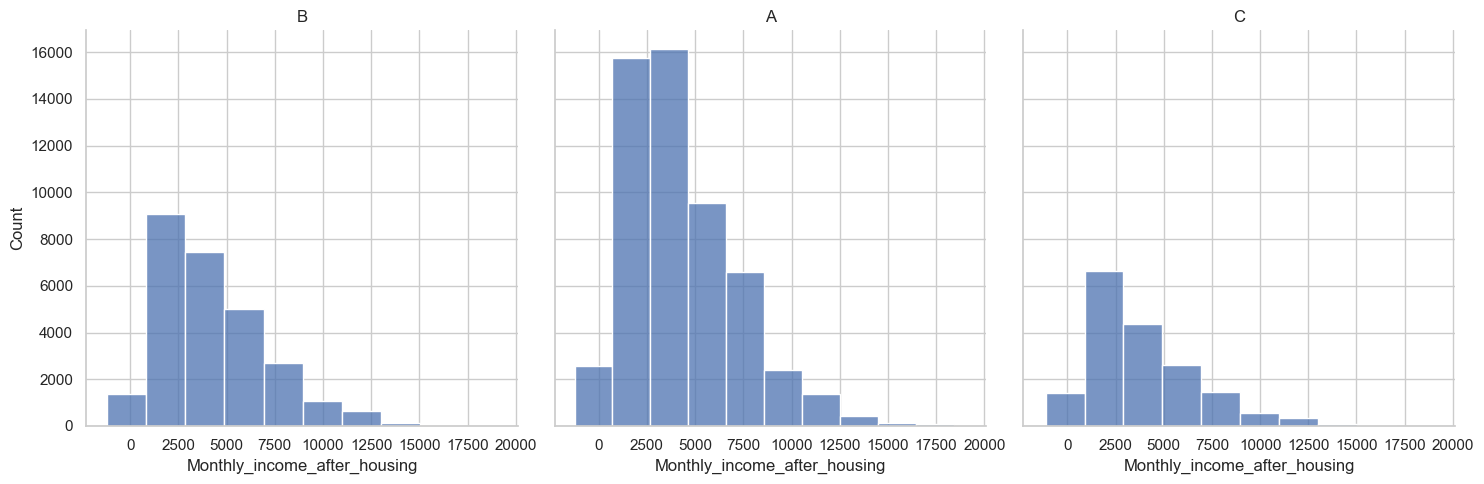

In [768]:
for num_col in numerical_columns:
    g = sns.FacetGrid(data, col='Lender', height=5, aspect=1)
    g.map_dataframe(sns.histplot, x=num_col, bins=10)
    g.set_titles('{col_name}')
    plt.tight_layout()
    plt.show()

**Making of Dataset for correlation and predictive model**

In [769]:
data_for_model = copy.deepcopy(data)

In [770]:
data_for_model['Monthly_income_after_housing'] = data_for_model['Monthly_Gross_Income'] - data_for_model['Monthly_Housing_Payment']
data_for_model['Percentage_income_housing_payment'] = round((data_for_model['Monthly_Housing_Payment'] / data_for_model['Monthly_Gross_Income'])*100,2)

In [771]:
data_for_model.head()

,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty,Monthly_income_after_housing,Percentage_income_housing_payment
0,cover_an_unexpected_cost,100000,669,fair,full_time,consumer_discretionary,5024,927,no,B,no,0,4097,18.45
1,credit_card_refinancing,70000,594,fair,full_time,information_technology,5764,1177,no,B,no,0,4587,20.42
2,home_improvement,10000,596,fair,full_time,information_technology,4017,1487,no,A,no,0,2530,37.02
3,home_improvement,100000,642,fair,part_time,energy,3129,904,no,A,no,0,2225,28.89
4,major_purchase,30000,642,fair,full_time,energy,4220,1620,no,A,no,0,2600,38.39


In [772]:
label_encoder = preprocessing.LabelEncoder() 
obj = (data_for_model.dtypes == 'object') 
for col in list(obj[obj].index): 
    data_for_model[col] = label_encoder.fit_transform(data_for_model[col])

In [773]:
data_for_model = data_for_model.drop(['bounty'], axis = 1)

In [774]:
data_for_model.head()

,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,Monthly_income_after_housing,Percentage_income_housing_payment
0,0,100000,669,1,0,1,5024,927,0,1,0,4097,18.45
1,1,70000,594,1,0,7,5764,1177,0,1,0,4587,20.42
2,3,10000,596,1,0,7,4017,1487,0,0,0,2530,37.02
3,3,100000,642,1,1,3,3129,904,0,0,0,2225,28.89
4,4,30000,642,1,0,3,4220,1620,0,0,0,2600,38.39


In [775]:
cors = data_for_model.corrwith(data_for_model['Approved']).sort_values(ascending=False)

print(cors)

Approved                             1.000000
FICO_score                           0.269587
Monthly_income_after_housing         0.180581
Monthly_Gross_Income                 0.171791
Lender                               0.044778
Employment_Sector                    0.010742
Fico_Score_group                     0.010469
Reason                              -0.001721
Monthly_Housing_Payment             -0.027558
Ever_Bankrupt_or_Foreclose          -0.035736
Loan_Amount                         -0.040089
Employment_Status                   -0.065473
Percentage_income_housing_payment   -0.121182
dtype: float64


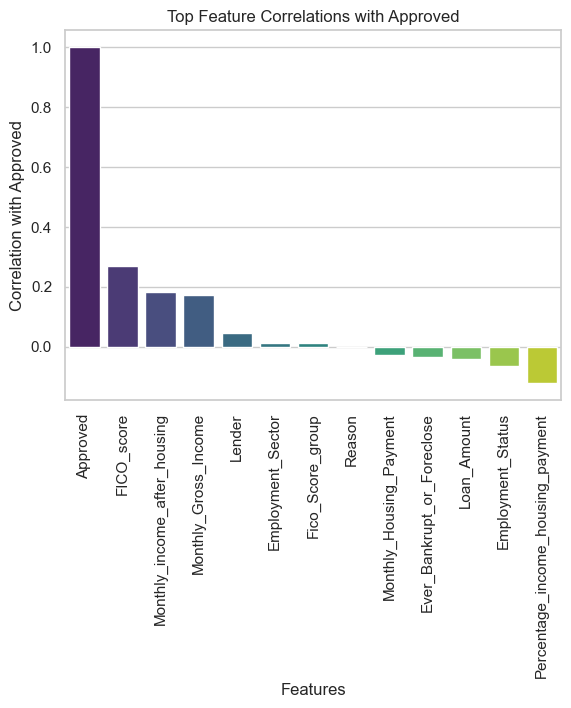

In [776]:
plt.figure()
sns.barplot(x=cors.index, y=cors, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Approved')
plt.title('Top Feature Correlations with Approved')
plt.show()

In [777]:
correlation_by_lender = {}
for lender_id in data_for_model['Lender'].unique():
    lender_data = data_for_model[data_for_model['Lender'] == lender_id]
    correlation_with_approved = lender_data.corrwith(lender_data['Approved']).sort_values(ascending=False)
    correlation_by_lender[f'Lender {lender_id}'] = correlation_with_approved
for lender, correlation in correlation_by_lender.items():
    print(f"Correlation for {lender}:")
    print(correlation)
    print()

Correlation for Lender 1:
Approved                             1.000000
FICO_score                           0.316949
Monthly_income_after_housing         0.205955
Monthly_Gross_Income                 0.197259
Fico_Score_group                     0.049250
Employment_Sector                    0.010345
Reason                               0.006172
Monthly_Housing_Payment             -0.015656
Ever_Bankrupt_or_Foreclose          -0.028599
Loan_Amount                         -0.033155
Employment_Status                   -0.074227
Percentage_income_housing_payment   -0.142000
Lender                                    NaN
dtype: float64

Correlation for Lender 0:
Approved                             1.000000
FICO_score                           0.264852
Monthly_Gross_Income                 0.185287
Monthly_income_after_housing         0.185033
Employment_Sector                    0.021351
Monthly_Housing_Payment              0.010163
Fico_Score_group                     0.003234
Reason      

**Predictive Model**

- Going to split the data into the three lenders to get a preidction for each of the three
- Removing the bounty varaible because the price the lender offers for approved application will not switch

In [778]:
lender_a = data_for_model[data_for_model['Lender'] == 0]
lender_b = data_for_model[data_for_model['Lender'] == 1]
lender_c= data_for_model[data_for_model['Lender'] == 2]

In [779]:
X_a = lender_a.drop(columns=['Approved'])
y_a = lender_a['Approved']
X_b = lender_b.drop(columns=['Approved'])
y_b = lender_b['Approved']
X_c = lender_c.drop(columns=['Approved'])
y_c = lender_c['Approved']

In [780]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(X_a, y_a, test_size=0.2, random_state=42)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_b, y_b, test_size=0.2, random_state=42)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

In [781]:
rm_model_a = RandomForestClassifier()
rm_model_a.fit(Xa_train,ya_train)

RandomForestClassifier()

In [782]:
feature_importances = rm_model_a.feature_importances_
importance_df = pd.DataFrame({
    'Feature': Xa_train.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
predictions = rm_model_a.predict(Xa_test)
ideal_customer_index = predictions.argmax()
ideal_customer = Xa_test.iloc[[ideal_customer_index]]
ideal_customer_approval_probability = rm_model_a.predict_proba(Xa_test)[ideal_customer_index][1] 
print("Feature Importance:")
print(importance_df)
print("\nIdeal Customer (Variables):")
print(ideal_customer)
print("\nProbability of Approval for Ideal Customer:", ideal_customer_approval_probability)

Feature Importance:
                              Feature  Importance
2                          FICO_score    0.178751
10       Monthly_income_after_housing    0.153351
11  Percentage_income_housing_payment    0.148154
7             Monthly_Housing_Payment    0.147477
6                Monthly_Gross_Income    0.147330
1                         Loan_Amount    0.069246
5                   Employment_Sector    0.065568
0                              Reason    0.050131
3                    Fico_Score_group    0.030790
4                   Employment_Status    0.007082
8          Ever_Bankrupt_or_Foreclose    0.002120
9                              Lender    0.000000

Ideal Customer (Variables):
       Reason  Loan_Amount  FICO_score  Fico_Score_group  Employment_Status  \
62433       2        20000         689                 2                  0   

       Employment_Sector  Monthly_Gross_Income  Monthly_Housing_Payment  \
62433                  0                 18536                     

In [783]:
rm_model_b = RandomForestClassifier()
rm_model_b.fit(Xb_train,yb_train)

RandomForestClassifier()

In [784]:
feature_importances = rm_model_b.feature_importances_
importance_df = pd.DataFrame({
    'Feature': Xb_train.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
predictions = rm_model_b.predict(Xb_test)
ideal_customer_index = predictions.argmax()
ideal_customer = Xb_test.iloc[[ideal_customer_index]]
ideal_customer_approval_probability = rm_model_b.predict_proba(Xb_test)[ideal_customer_index][1] 
print("Feature Importance:")
print(importance_df)
print("\nIdeal Customer (Variables):")
print(ideal_customer)
print("\nProbability of Approval for Ideal Customer:", ideal_customer_approval_probability)

Feature Importance:
                              Feature  Importance
2                          FICO_score    0.212393
6                Monthly_Gross_Income    0.140998
11  Percentage_income_housing_payment    0.138412
10       Monthly_income_after_housing    0.136374
7             Monthly_Housing_Payment    0.131335
1                         Loan_Amount    0.068983
5                   Employment_Sector    0.065517
0                              Reason    0.049636
3                    Fico_Score_group    0.048762
4                   Employment_Status    0.006720
8          Ever_Bankrupt_or_Foreclose    0.000871
9                              Lender    0.000000

Ideal Customer (Variables):
       Reason  Loan_Amount  FICO_score  Fico_Score_group  Employment_Status  \
65734       2        10000         823                 0                  0   

       Employment_Sector  Monthly_Gross_Income  Monthly_Housing_Payment  \
65734                  3                 14054                     

In [785]:
rm_model_c = RandomForestClassifier()
rm_model_c.fit(Xc_train,yc_train)

RandomForestClassifier()

In [786]:
feature_importances = rm_model_c.feature_importances_
importance_df = pd.DataFrame({
    'Feature': Xc_train.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
predictions = rm_model_c.predict(Xc_test)
ideal_customer_index = predictions.argmax()
ideal_customer = Xc_test.iloc[[ideal_customer_index]]
ideal_customer_approval_probability = rm_model_c.predict_proba(Xc_test)[ideal_customer_index][1] 
print("Feature Importance:")
print(importance_df)
print("\nIdeal Customer (Variables):")
print(ideal_customer)
print("\nProbability of Approval for Ideal Customer:", ideal_customer_approval_probability)

Feature Importance:
                              Feature  Importance
2                          FICO_score    0.177984
11  Percentage_income_housing_payment    0.145522
7             Monthly_Housing_Payment    0.141109
6                Monthly_Gross_Income    0.140006
10       Monthly_income_after_housing    0.137521
1                         Loan_Amount    0.076934
5                   Employment_Sector    0.068218
0                              Reason    0.055743
3                    Fico_Score_group    0.033293
4                   Employment_Status    0.019726
8          Ever_Bankrupt_or_Foreclose    0.003945
9                              Lender    0.000000

Ideal Customer (Variables):
       Reason  Loan_Amount  FICO_score  Fico_Score_group  Employment_Status  \
22288       1        10000         599                 1                  0   

       Employment_Sector  Monthly_Gross_Income  Monthly_Housing_Payment  \
22288                  5                  8277                     